<a href="https://colab.research.google.com/github/Gizmo-Labs/Statistical-Computing/blob/master/Statistical-Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Computing - Capstone Project

## Data-Preparation

<div align="left">
<h2><img src="https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif" width="200" alt="Data"></h2>
</div>

This part of Juypter-Notebook contains all steps to come from the raw Dataset to the one we wish to have
<br/>



## ▶️ In the first step we clone our Github-Repository to get the project structure

In [2]:
!git clone https://github.com/Gizmo-Labs/Statistical-Computing.git

Cloning into 'Statistical-Computing'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 33 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (33/33), 613.11 KiB | 2.99 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
import pandas as pd


## ▶️ Second step is to import each .csv-file in a single pandas dataframe

In [4]:
# Import the .csv-file with the weather datasets
time_series_df = pd.read_csv('/content/Statistical-Computing/data/data.csv', index_col=False)

# Dropping the columns we don't need for our analysis
time_series_df = time_series_df.drop(['Qualitaet_Byte', 'Qualitaet_Niveau'], axis=1)

# Now the .csv-file with the product codes
product_code_df = pd.read_csv('/content/Statistical-Computing/data/prd.csv', index_col=False)

# Dropping the columns we don't need for our analysis
product_code_df = product_code_df.drop(['Beschreibung_DWD', 'Beschreibung_Inspire'], axis=1)

# And at last the .csv-file with the station data
station_names_df = pd.read_csv('/content/Statistical-Computing/data/sdo.csv', index_col=False)

# Dropping the columns we don't need for our analysis
station_names_df = station_names_df.drop(['Geogr_Laenge', 'Geogr_Breite', 'Hoehe_ueber_NN', 'Metadata_Link'], axis=1)


✔️ Our weather data table looks like this for the moment!

In [5]:
time_series_df.head(2)

,Produkt_Code,SDO_ID,Zeitstempel,Wert
0,OBS_DEU_P1D_SD,1228,2014-01-01,0.0
1,OBS_DEU_P1D_SD,1228,2014-01-02,0.3


✔️ Our product-code table like this!

In [6]:
product_code_df.head(2)

,Produkt_Code,Produkt_Titel,Einheit
0,OBS_DEU_P1D_SD,Daily station observations of sunshine duratio...,hours
1,OBS_DEU_P1D_T2M_X,Daily station observations of maximal temperat...,°C


✔️ And finally the station table like this!

In [7]:
station_names_df.head(2)

,SDO_ID,SDO_Name
0,1379,Flensburg (Schäferhaus)
1,7367,Alfeld


## ▶️ Third step converts our Data-Frames into a single one to simplify our further processing

In [8]:
# We combine our weather data with our product-code data in one single table
complete_values_df = pd.merge(time_series_df, product_code_df, on='Produkt_Code')

# Then we take this artifact on combine it with the station data
complete_values_df = pd.merge(complete_values_df, station_names_df, on='SDO_ID')

# The result gives us a single table where we now can see the locations and type of time-series
complete_values_df.head(2)

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Produkt_Titel,Einheit,SDO_Name
0,OBS_DEU_P1D_SD,1228,2014-01-01,0.0,Daily station observations of sunshine duratio...,hours,UFS TW Ems
1,OBS_DEU_P1D_SD,1228,2014-01-02,0.3,Daily station observations of sunshine duratio...,hours,UFS TW Ems


## ▶️ Now that we have ONE single Data-Frame with our values, we have to clean it up a bit!

In [9]:
# After merging we do no longer need some columns
complete_values_df = complete_values_df.drop(['Produkt_Code', 'SDO_ID', 'Einheit'], axis=1)

complete_values_df.head()

,Zeitstempel,Wert,Produkt_Titel,SDO_Name
0,2014-01-01,0.0,Daily station observations of sunshine duratio...,UFS TW Ems
1,2014-01-02,0.3,Daily station observations of sunshine duratio...,UFS TW Ems
2,2014-01-03,0.9,Daily station observations of sunshine duratio...,UFS TW Ems
3,2014-01-04,1.5,Daily station observations of sunshine duratio...,UFS TW Ems
4,2014-01-05,3.1,Daily station observations of sunshine duratio...,UFS TW Ems


## ▶️ Now we check our Data-Types and if necessary convert them to the right format!

In [10]:
complete_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107080 entries, 0 to 107079
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Zeitstempel    107080 non-null  object 
 1   Wert           107080 non-null  float64
 2   Produkt_Titel  107080 non-null  object 
 3   SDO_Name       107080 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.1+ MB


## ▶️ As we can see we have 4 Object Dtypes, this is bad..
- We convert the Column "Zeitstempel" into DateTime
- We convert the Columns "Produkt_Titel" + "Einheit" + "SDO_Name" int String
- Lastly we rename the Column "Produkt_Titel" into "Messreihe" and "SDO-Name" into "Ort"

In [11]:
# As described first we convert "Zeitstempel" to dateTime
complete_values_df['Zeitstempel'] = pd.to_datetime(complete_values_df.Zeitstempel)

# Now "Produkt-Titel" to string
complete_values_df['Produkt_Titel'] = complete_values_df['Produkt_Titel'].astype("string")

# And finally "SDO_Name" to string
complete_values_df['SDO_Name'] = complete_values_df['SDO_Name'].astype("string")

# In the last sub-step we rename "SDO_Name" to german "Ort"
complete_values_df.columns = ['Zeitstempel', 'Wert', 'Messreihe', 'Ort']

complete_values_df


,Zeitstempel,Wert,Messreihe,Ort
0,2014-01-01,0.0,Daily station observations of sunshine duratio...,UFS TW Ems
1,2014-01-02,0.3,Daily station observations of sunshine duratio...,UFS TW Ems
2,2014-01-03,0.9,Daily station observations of sunshine duratio...,UFS TW Ems
3,2014-01-04,1.5,Daily station observations of sunshine duratio...,UFS TW Ems
4,2014-01-05,3.1,Daily station observations of sunshine duratio...,UFS TW Ems
...,...,...,...,...
107075,2024-01-11,0.9,Daily mean of station observations of wind spe...,Alfeld
107076,2024-01-12,2.7,Daily mean of station observations of wind spe...,Alfeld
107077,2024-01-13,2.8,Daily mean of station observations of wind spe...,Alfeld
107078,2024-01-14,3.6,Daily mean of station observations of wind spe...,Alfeld


## ▶️ For our graphical Diagrams we need to separate our Time-Series into single ones
- Remember that the CDC-Portal puts us all our items into one file
- This means we have three Time-Series from 2014 to 2024 on top of each other in our current Dataframe
- For this reason we split the Data according to the column "Messreihe"
- When splitting is done, we reset the indexes of each new Data-Frame
- For better understanding we rename the column-values of "Messreihe" to german

In [12]:
# We pick all values of the Time-Series for Sunshine Duration
sunshine_duration_df = complete_values_df.query('Messreihe == "Daily station observations of sunshine duration in hours"' )

# For this Subset we set the index back to zero
sunshine_duration_df.reset_index(drop=True,inplace=True)

# We create a new instance for further processing
sd_df = sunshine_duration_df.copy()

# Rename all values in column "Messreihe" with a better readeable one in german
sd_df['Messreihe'] = sd_df['Messreihe'].str.replace("Daily station observations of sunshine duration in hours", "Sonnenscheindauer in [h]", regex=False)

###########################

# We pick all values of the Time-Series for Maximum Temperature
max_temperature_df = complete_values_df.query('Messreihe == "Daily station observations of maximal temperature at 2 m above ground in °C"')

# For this Subset we set the index back to zero
max_temperature_df.reset_index(drop=True,inplace=True)

# We create a new instance for further processing
mx_df = max_temperature_df.copy()

# Rename all values in column "Messreihe" with a better readeable one in german
mx_df['Messreihe'] = mx_df['Messreihe'].str.replace("Daily station observations of maximal temperature at 2 m above ground in °C", "Maximaltemperatur in [°C]", regex=False)

###########################

# We pick all values of the Time-Series for Wind Speed
wind_speed_df = complete_values_df.query('Messreihe == "Daily mean of station observations of wind speed at ca. 10 m above ground in m/s"')

# For this Subset we set the index back to zero
wind_speed_df.reset_index(drop=True,inplace=True)

# We create a new instance for further processing
wd_df = wind_speed_df.copy()

# Rename all values in column "Messreihe" with a better readeable one in german
wd_df['Messreihe'] = wd_df['Messreihe'].str.replace("Daily mean of station observations of wind speed at ca. 10 m above ground in m/s", "Windgeschwindigkeit in [m/s]", regex=False)


## ▶️ At this point the prepartion of our Datasets is done!
- Next we move on to the statistical analysis
- This is done in a new Jupyter Notebook
- Below you see the current state of each Dataset

In [ ]:
# Final version of "Sunshine-Duration" Dataset
sd_df

,Zeitstempel,Wert,Messreihe,Ort
0,2014-01-01,0.00,Sonnenscheindauer in [h],UFS TW Ems
1,2014-01-02,0.30,Sonnenscheindauer in [h],UFS TW Ems
2,2014-01-03,0.90,Sonnenscheindauer in [h],UFS TW Ems
3,2014-01-04,1.50,Sonnenscheindauer in [h],UFS TW Ems
4,2014-01-05,3.10,Sonnenscheindauer in [h],UFS TW Ems
...,...,...,...,...
35027,2024-01-11,7.60,Sonnenscheindauer in [h],Offenbach-Wetterpark
35028,2024-01-12,0.00,Sonnenscheindauer in [h],Offenbach-Wetterpark
35029,2024-01-13,0.00,Sonnenscheindauer in [h],Offenbach-Wetterpark
35030,2024-01-14,0.00,Sonnenscheindauer in [h],Offenbach-Wetterpark


In [ ]:
# Final version of "Maximum Temperature" Dataset
mx_df

,Zeitstempel,Wert,Messreihe
Ort,,,
List auf Sylt,2014-01-01,5.9,Maximaltemperatur in [°C]
List auf Sylt,2014-01-02,7.5,Maximaltemperatur in [°C]
List auf Sylt,2014-01-03,8.0,Maximaltemperatur in [°C]
List auf Sylt,2014-01-04,7.3,Maximaltemperatur in [°C]
List auf Sylt,2014-01-05,7.3,Maximaltemperatur in [°C]
...,...,...,...
Cuxhaven,2024-01-11,4.5,Maximaltemperatur in [°C]
Cuxhaven,2024-01-12,5.3,Maximaltemperatur in [°C]
Cuxhaven,2024-01-13,5.9,Maximaltemperatur in [°C]


In [ ]:
# Final version of "Wind Speed" Dataset
print(wd_df)

      Zeitstempel  Wert                     Messreihe     Ort
0      2014-01-01   5.4  Windgeschwindigkeit in [m/s]    Leck
1      2014-01-02   6.7  Windgeschwindigkeit in [m/s]    Leck
2      2014-01-03   7.3  Windgeschwindigkeit in [m/s]    Leck
3      2014-01-04   7.4  Windgeschwindigkeit in [m/s]    Leck
4      2014-01-05   4.5  Windgeschwindigkeit in [m/s]    Leck
...           ...   ...                           ...     ...
35407  2024-01-11   0.9  Windgeschwindigkeit in [m/s]  Alfeld
35408  2024-01-12   2.7  Windgeschwindigkeit in [m/s]  Alfeld
35409  2024-01-13   2.8  Windgeschwindigkeit in [m/s]  Alfeld
35410  2024-01-14   3.6  Windgeschwindigkeit in [m/s]  Alfeld
35411  2024-01-15   3.9  Windgeschwindigkeit in [m/s]  Alfeld

[35412 rows x 4 columns]


## Data-Analysis

Here starts the part of Data Analysis

<ipython-input-22-0ad7e6af9f5a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,  horizontalalignment='right')


[Text(0, 0, 'Leuchtturm Kiel'),
 Text(1, 0, 'Weimar-Schöndorf'),
 Text(2, 0, 'Offenbach-Wetterpark'),
 Text(3, 0, 'Martinroda'),
 Text(4, 0, 'Schleswig'),
 Text(5, 0, 'List auf Sylt'),
 Text(6, 0, 'Dörnick'),
 Text(7, 0, 'Ostenfeld (Rendsburg)'),
 Text(8, 0, 'UFS TW Ems'),
 Text(9, 0, 'Leck')]

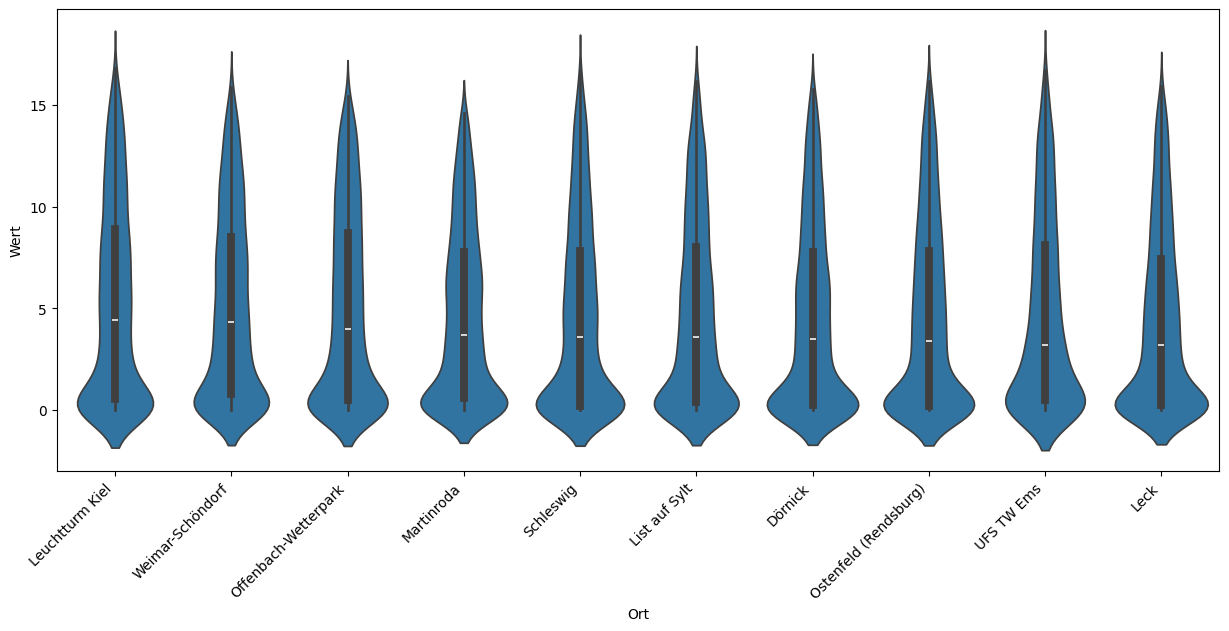

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plot_order = sd_df.groupby(by=['Ort'])['Wert'].median().sort_values().iloc[::-1].index

fig, ax = plt.subplots(figsize=(15,6))

my_plot = sns.violinplot(data=sd_df, x="Ort", y="Wert", order=plot_order)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,  horizontalalignment='right')



## Berechnung der Varianz

<ipython-input-38-3baad0842fe3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,  horizontalalignment='right')


Text(0.5, 0.98, 'Maximaltemperaturverlauf 2014 - 2024\nnach Median aufsteigend sortiert')

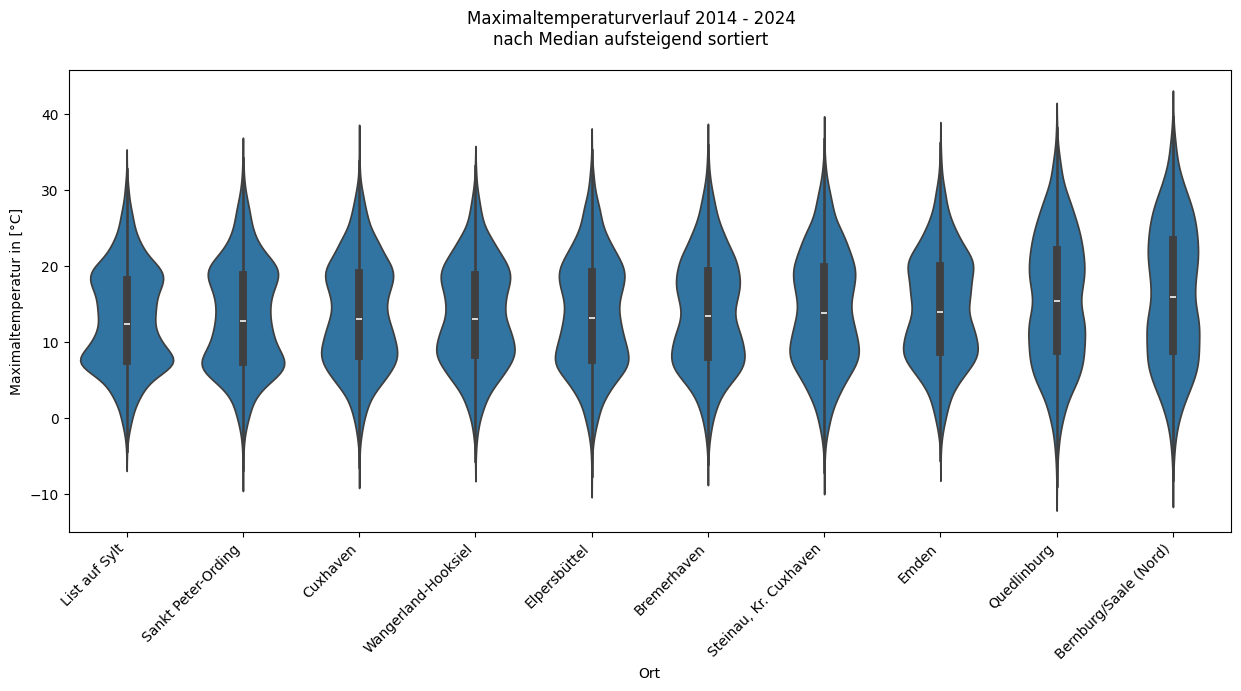

In [38]:

plot_order = mx_df.groupby(by=['Ort'])['Wert'].median().sort_values().iloc[::1].index

fig, ax = plt.subplots(figsize=(15,6))
ax.set(ylabel='Maximaltemperatur in [°C]')

my_plot = sns.violinplot(data=mx_df, x="Ort", y="Wert", order=plot_order)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,  horizontalalignment='right')
fig.suptitle('Maximaltemperaturverlauf 2014 - 2024\nnach Median aufsteigend sortiert', fontsize=12)
